/tmp/ipython-input-4279630715.py:31: RuntimeWarning: overflow encountered in scalar power
  det = np.prod(np.diag(L))**2
/usr/local/lib/python3.12/dist-packages/numpy/linalg/_linalg.py:2371: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


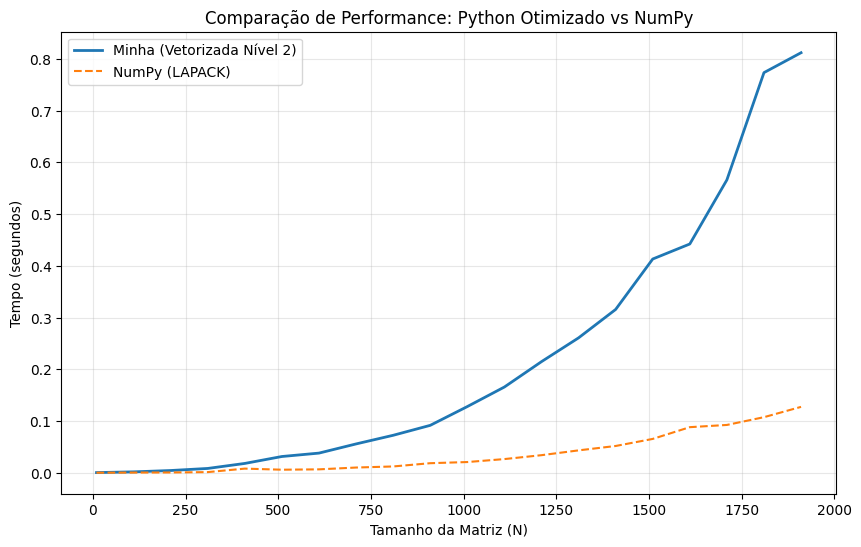

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def time_function(f):
    def wrap(*args):
        start = time.time()
        ret = f(*args)
        end = time.time()
        return ret, end - start
    return wrap

@time_function
def quick_det_vectorized(A):
    S = A @ A.T
    N = S.shape[0]
    L = np.zeros((N, N))

    for j in range(N):
        s = S[j, j] - np.dot(L[j, :j], L[j, :j])

        if s <= 0: s = 1e-10
        L[j, j] = np.sqrt(s)

        correction = np.dot(L[j+1:, :j], L[j, :j])

        L[j+1:, j] = (S[j+1:, j] - correction) / L[j, j]

    det = np.prod(np.diag(L))**2
    return det

tempos_minha = []
tempos_numpy = []
tamanhos = range(10, 2000, 100) #

for N in tamanhos:
    M_E = np.random.rand(N, N)
    S_ref = M_E @ M_E.T

    det, tempo_meu = quick_det_vectorized(M_E)
    tempos_minha.append(tempo_meu)

    start = time.time()
    np.linalg.det(S_ref)
    end = time.time()
    tempos_numpy.append(end - start)

plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos_minha, label='Minha ', linewidth=2)
plt.plot(tamanhos, tempos_numpy, label='NumPy ', linestyle='--')
plt.xlabel('Tamanho da Matriz (N)')
plt.ylabel('Tempo (segundos)')
plt.title('Comparação de Performance: Python Otimizado vs NumPy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()